In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.express as px

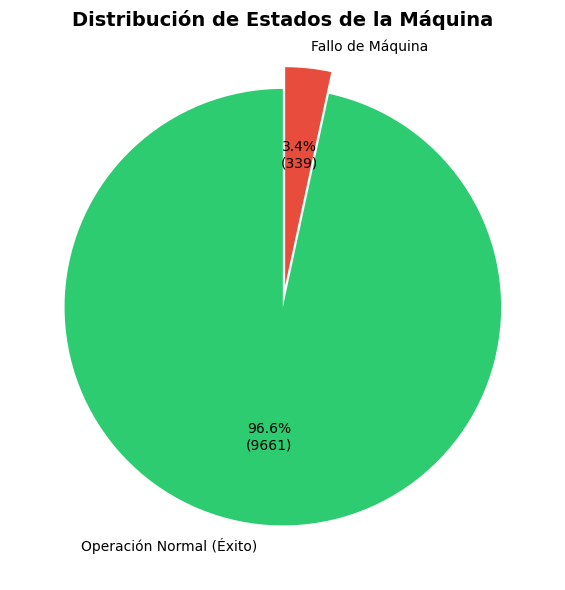

In [2]:
#distribucion de los estados de las maquinas, fallo o exito
df = pd.read_csv('database.csv')
plt.figure(figsize=(10, 6))
ax = df['Machine failure'].value_counts().plot.pie(
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
    startangle=90,
    labels=['Operación Normal (Éxito)', 'Fallo de Máquina'],
    colors=['#2ecc71', '#e74c3c'],  
    explode=(0, 0.1) 
)
plt.title('Distribución de Estados de la Máquina', fontsize=14, fontweight='bold')
plt.ylabel('')  
plt.tight_layout()
plt.show()

C:\Users\Nelkis\AppData\Local\Temp\ipykernel_11612\596797862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_fallos, y=conteo_fallos.values, palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'TWF'),
  Text(1, 0, 'HDF'),
  Text(2, 0, 'PWF'),
  Text(3, 0, 'OSF'),
  Text(4, 0, 'RNF')])

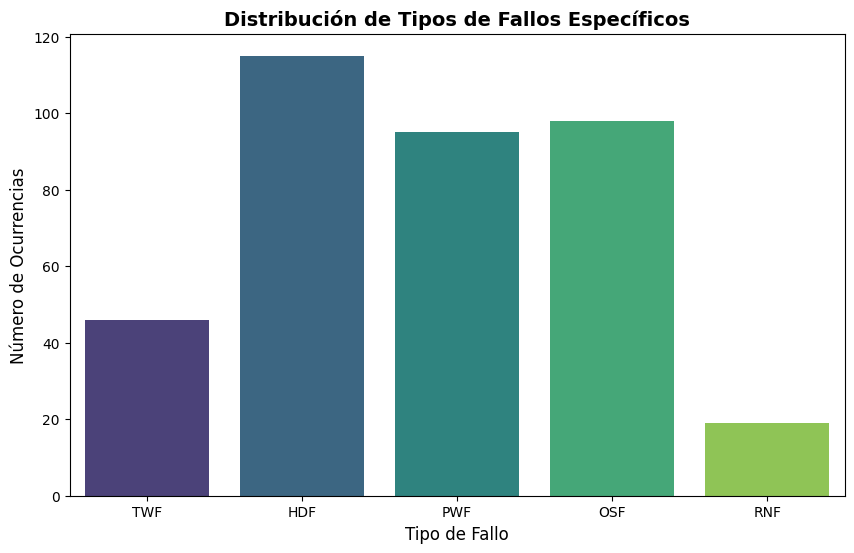

In [3]:
#distribucion de los tipos de fallos
plt.figure(figsize=(10, 6))
tipos_fallos = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
conteo_fallos = df[tipos_fallos].sum()

sns.barplot(x=tipos_fallos, y=conteo_fallos.values, palette='viridis')
plt.title('Distribución de Tipos de Fallos Específicos', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Fallo', fontsize=12)
plt.ylabel('Número de Ocurrencias', fontsize=12)
plt.xticks()


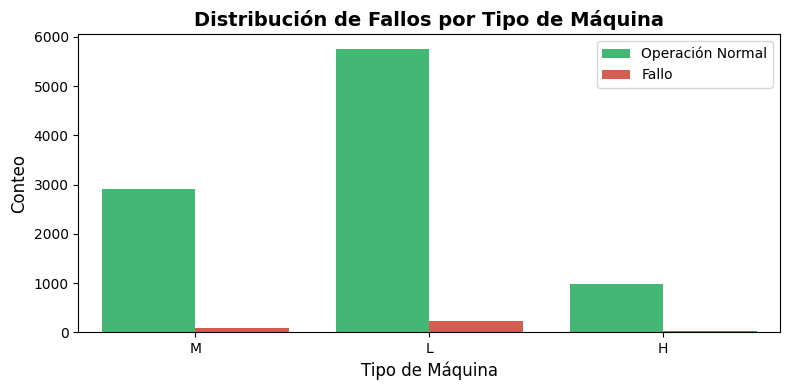

In [4]:
#dsitribucion de fallos por tipos de maquinas
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Type', hue='Machine failure', 
              palette={0: '#2ecc71', 1: '#e74c3c'})
plt.title('Distribución de Fallos por Tipo de Máquina', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Máquina', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(['Operación Normal', 'Fallo'])
plt.tight_layout()
plt.show()

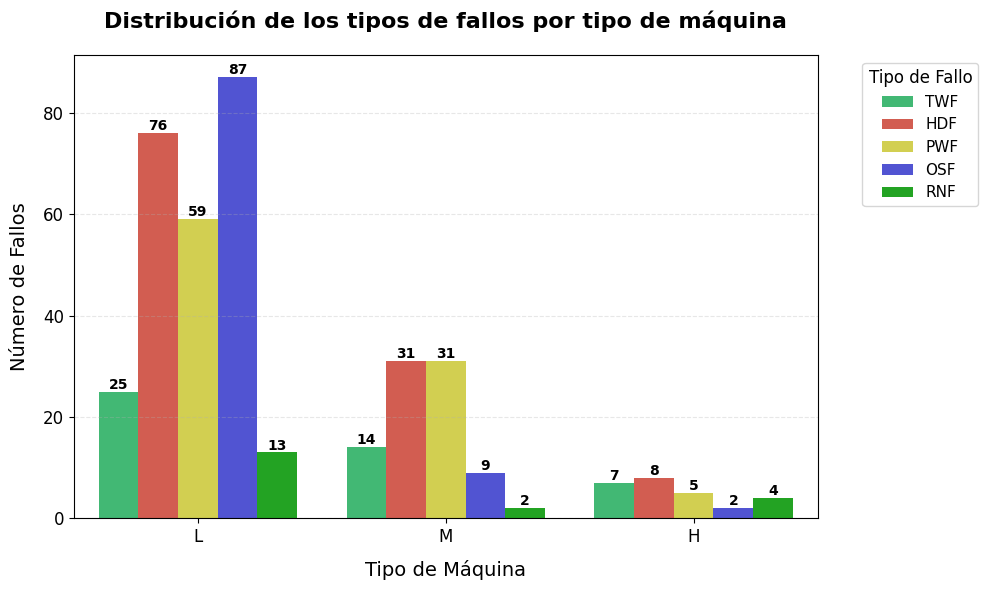

In [ ]:
#distribucion de los tipos de fallos por los tipos de maquina
df_melted = df.melt(id_vars=['Type'], 
                    value_vars=tipos_fallos,
                    var_name='Tipo_Fallo', 
                    value_name='Ocurrencia')

df_fallos = df_melted[df_melted['Ocurrencia'] == 1]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_fallos, x='Type', hue='Tipo_Fallo',
                    palette={'TWF': '#2ecc71', 'HDF': '#e74c3c', 'PWF': "#e7e43c", 
                            'OSF': "#3c3fe7", 'RNF': "#0eb80e"},
                    order=['L', 'M', 'H'])  

plt.title('Distribución de los tipos de fallos por tipo de máquina', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Máquina', fontsize=14, labelpad=10)
plt.ylabel('Número de Fallos', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir el valor en cada barra
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10, fontweight='bold')

plt.legend(title='Tipo de Fallo', title_fontsize=12, fontsize=11, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
#desgaste por herramientas

df_fl = df[['Type', 'Tool wear [min]', 'Machine failure', 'TWF']]
df_filtres = df_fl[df_fl['TWF'] == 1]

fig_tool = go.Figure()

tipos_maquina = df_filtres['Type'].unique()
colores = px.colors.qualitative.Plotly

for i, tipo in enumerate(tipos_maquina):
    df_tipo = df_filtres[df_filtres['Type'] == tipo]
    
    fig_tool.add_trace(go.Scatter(
        x=df_tipo.index,  
        y=df_tipo['Tool wear [min]'], 
        mode='lines+markers',  
        name=f'Tipo {tipo}',  
        line=dict(color=colores[i], width=2),
        visible=True,  
        hovertemplate=f"<b>Tipo {tipo}</b><br>" +  
                      "Desgaste: %{y:.2f} min<br>" +
                      "<extra></extra>"  
    ))

fig_tool.update_layout(
    title={
        'text': 'Desgaste de Herramientas por Tipo de Máquina',  
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Tamaño de la muestra',
    yaxis_title='Desgaste (min)',
    hovermode='closest'
)
fig_tool.show()

In [ ]:
#desgaste por herramientas

df_fl = df[['Type', 'Torque [Nm]', 'OSF']]
df_filtres = df_fl[df_fl['OSF'] == 1]

fig_osf = go.Figure()

for i, tipo in enumerate(tipos_maquina):
    df_tipo = df_filtres[df_filtres['Type'] == tipo]
    
    fig_osf.add_trace(go.Scatter(
        x=df_tipo.index,  
        y=df_tipo['Torque [Nm]'], 
        mode='lines+markers',  
        name=f'Tipo {tipo}',  
        line=dict(color=colores[i], width=2),
        visible=True,  
        hovertemplate=f"<b>Tipo {tipo}</b><br>" +  
                      "Esfuerzo: %{y:.2f}<br>" +
                      "<extra></extra>"  
    ))

fig_osf.update_layout(
    title={
        'text': 'Fallos por sobreesfuerzo',  
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Tamaño de la muestra',
    yaxis_title='Esfuerzo de torsión',
    hovermode='closest'
)
fig_osf.show()